In [1]:
from nltk.corpus import PlaintextCorpusReader, stopwords
from nltk.tokenize import RegexpTokenizer, sent_tokenize
import sys
import codecs

regxT = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('spanish'))

corpus_root = "texts/"
my_corpus = PlaintextCorpusReader(corpus_root, '.*txt')
documents = []
titles = []
shortest = sys.maxsize

# Read in the files.
for text in my_corpus.fileids():
	afile = codecs.open(corpus_root + text, 'r', 'utf-8-sig')
	txt = afile.read()
    
    #Sentence tokenize the text
	sent_token_list = sent_tokenize(txt)
	#print ("There are " + str(len(sent_token_list)) + " sentences in "+ str(text))

	# regex tokenize the texts
	regxd = regxT.tokenize(str(txt).lower())

	# create list of non-stop words for each text
	prechunk = []	
	for tokens in regxd:
		if (tokens not in stop_words):
			prechunk.append(tokens)
	#print(len(prechunk))
    
	#Calculate the Mean Sentence Length in the text
	msl= int(len(regxd)/len(sent_token_list))
	print ("The Mean Sentence Length in "+ str(text[:-4])+ " is " + str(msl))
	
    
	# add preprocessed texts to the documents list (as string)
	documents.append(' '.join(prechunk))
	titles.append(text[:-4])
	

# Get the length of each file


# chunk them and save as individual files

The Mean Sentence Length in Allende_Eva-Luna_1984 is 25
The Mean Sentence Length in Allende_La-casa-de-los-espirutos_1982 is 23
The Mean Sentence Length in Cortazar_Bestiario_1951 is 21
The Mean Sentence Length in Cortazar_Final-del-juego_1956 is 24
The Mean Sentence Length in Esquivel_Como-Agua-Para-Chocolate_1989 is 18
The Mean Sentence Length in Esquivel_La-ley-del-amor_1995 is 14
The Mean Sentence Length in Fuentes_Aura_1962 is 15
The Mean Sentence Length in Fuentes_La-Muerte-de-Artemio_cruz_1962 is 18
The Mean Sentence Length in Garcia-Marquez_Cien-anos_1967 is 26
The Mean Sentence Length in Garcia-Marquez_Cronica-de-una-Muerte-Anunciada_1981 is 22
The Mean Sentence Length in Garcia-Marquez_El-Amor-en-los-tiempos-de-colera_1985 is 29
The Mean Sentence Length in Garcia-Marquez_El-Coronel_1961 is 10
The Mean Sentence Length in Rulfo_El-llano-en-llamas_1953 is 14
The Mean Sentence Length in Rulfo_Pedro-Paramo_1955 is 9


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


def get_top_terms_per_cluster(num_of_terms,num_of_k, model_param, vectorizer_param):
    print("Top terms per cluster:")
    order_centroids = model_param.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer_param.get_feature_names()
    for i in range(num_of_k):
        print ("Cluster %d:" % i)
        for ind in order_centroids[i, :num_of_terms]:
            print (' %s' % terms[ind])
            
def create_dendrogram(tfidf_model_param, titles_param):

    from sklearn.metrics.pairwise import cosine_similarity
    from scipy.cluster.hierarchy import ward, dendrogram
    import matplotlib.pyplot as plt
    %matplotlib inline 

    dist = 1 - cosine_similarity(tfidf_model_param)
    
    linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

    fig, ax = plt.subplots(figsize=(10, 15)) # set size
    ax = dendrogram(linkage_matrix, orientation="right", labels=titles_param);

    plt.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')

    plt.tight_layout() #show plot with tight layout

    #uncomment below to save figure
    plt.savefig('dendrogram.png', dpi=200) #save figure as ward_clusters

In [11]:
vectorizer = TfidfVectorizer(stop_words,lowercase=True)
tfidf_model= vectorizer.fit_transform(documents)

In [22]:
## Defining number of clusters
true_k=14

## Create the K-means representation
model= KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

## Apply the K-means representation to our tfidf mfate. Create the K means output
model.fit(tfidf_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=14, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
get_top_terms_per_cluster(10 ,true_k, model, vectorizer)

Top terms per cluster:
Cluster 0:
 tita
 elena
 rosaura
 pedro
 john
 chencha
 gertrudis
 mamá
 nacha
 pues
Cluster 1:
 años
 vez
 si
 sólo
 hombre
 dos
 mujer
 casa
 clarisa
 cada
Cluster 2:
 coronel
 dijo
 sabas
 mujer
 gallo
 médico
 compadre
 don
 casa
 agustín
Cluster 3:
 vicario
 nasar
 santiago
 dijo
 román
 bayardo
 ángela
 bedoya
 casa
 clotilde
Cluster 4:
 si
 páramo
 susana
 pedro
 usted
 aquí
 padre
 dijo
 damiana
 allá
Cluster 5:
 aura
 si
 recamara
 mas
 señora
 puerta
 montero
 mano
 consuelo
 anciana
Cluster 6:
 trueba
 esteban
 clara
 jaime
 garcía
 alba
 casa
 blanca
 férula
 marías
Cluster 7:
 azucena
 rodrigo
 cuquita
 isabel
 citlali
 si
 ex
 teo
 pues
 cuerpo
Cluster 8:
 aureliano
 úrsula
 arcadio
 buendía
 amaranta
 fernanda
 josé
 macondo
 casa
 coronel
Cluster 9:
 ariza
 daza
 florentino
 fermina
 urbino
 juvenal
 vez
 amor
 casa
 años
Cluster 10:
 delia
 rema
 mauro
 mario
 celina
 mañara
 mancuspias
 si
 isabel
 nene
Cluster 11:
 si
 vez
 somoza
 leticia
 mor

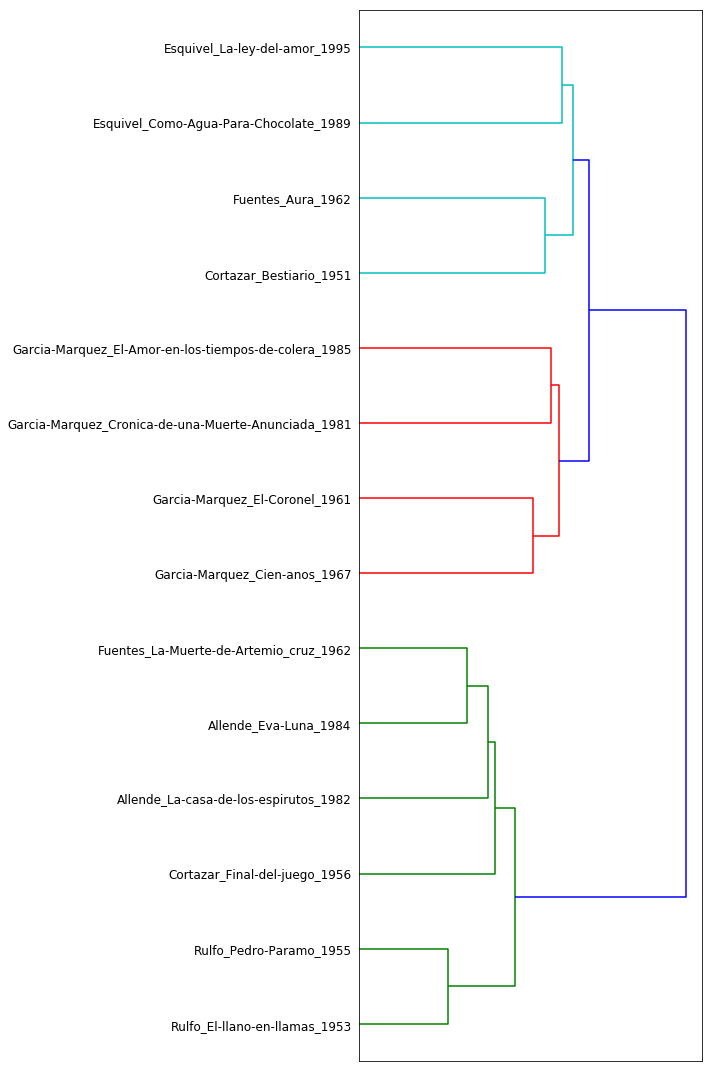

In [20]:
create_dendrogram(tfidf_model, titles)